# EDA 데이터 전처리 연습

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/namhunkim/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/EDA/data/전처리Trial/KR_youtube_trending_data.csv')
cat = pd.read_csv('/Users/namhunkim/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/EDA/data/전처리Trial/category_name.csv')

print(df.head(5), '\n\n\n##########################################\n\n\n')
print(cat.head(5))

      video_id                                             title  \
0  uq5LClQN3cE                                       안녕하세요 보겸입니다   
1  I-ZbZCHsHD0                                부락토스의 계획 [총몇명 프리퀄]   
2  9d7jNUjBoss                                   평생 반성하면서 살겠습니다.   
3  3pI_L3-sMVg                              안녕하세요 꽈뚜룹입니다.   
4  zrsBjYukE8s  박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V   

            publishedAt                 channelId       channelTitle  \
0  2020-08-09T09:32:48Z  UCu9BCtGIEr73LXZsKmoujKw              보겸 BK   
1  2020-08-12T09:00:08Z  UCRuSxVu4iqTK5kCh90ntAgA                총몇명   
2  2020-08-10T09:54:13Z  UCMVC92EOs9yDJG5JS-CMesQ        양팡 YangPang   
3  2020-08-11T15:00:58Z  UCkQCwnkQfgSuPTTnw_Y7v7w      꽈뚜룹 Quaddurup   
4  2020-08-11T09:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg  JYP Entertainment   

   categoryId         trending_date  \
0          24  2020-08-12T00:00:00Z   
1           1  2020-08-12T00:00:00Z   
2          22  2020-08-12T00:00:00Z   
3 

## 2. df 탐구

### index, columns와 dtypes 확인

In [3]:
# index, columns

print(df.shape)
print(cat.shape)

(137554, 16)
(31, 6)


In [4]:
print('columns of df :', len(df.columns))
print('rows of df :', len(df.index),'\n')

print('columns of cat :', len(cat.columns))
print('rows of cat :', len(cat.index))

columns of df : 16
rows of df : 137554 

columns of cat : 6
rows of cat : 31


In [5]:
print(df.columns, '\n')
print(cat.columns)

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object') 

Index(['kind', 'etag', 'id', 'snippet.title', 'snippet.assignable',
       'snippet.channelId'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137554 entries, 0 to 137553
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           137554 non-null  object
 1   title              137554 non-null  object
 2   publishedAt        137554 non-null  object
 3   channelId          137554 non-null  object
 4   channelTitle       137554 non-null  object
 5   categoryId         137554 non-null  int64 
 6   trending_date      137554 non-null  object
 7   tags               137554 non-null  object
 8   view_count         137554 non-null  int64 
 9   likes              137554 non-null  int64 
 10  dislikes           137554 non-null  int64 
 11  comment_count      137554 non-null  int64 
 12  thumbnail_link     137554 non-null  object
 13  comments_disabled  137554 non-null  bool  
 14  ratings_disabled   137554 non-null  bool  
 15  description        134011 non-null  object
dtypes: bool(2), int64(5)

In [7]:
# dtypes

df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [8]:
df.loc[:,'categoryId'].dtypes

dtype('int64')

In [9]:
df.loc[:,['publishedAt','trending_date']].dtypes

publishedAt      object
trending_date    object
dtype: object

### 결측값 확인

In [10]:
# 결측값 확인

# 1. pd.isnull() or df.isnull()
np.sum(pd.isnull(df))

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          3543
dtype: int64

In [11]:
df.head(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN


In [12]:
# 2. np.isnan() <- object는 불가능하다. (int,float/bool) 등만 가능; nan = Not A Number

print(np.isnan(df.loc[0,['categoryId']].astype('int64')),'\n')
print(np.sum(np.isnan(df.loc[:,['categoryId','view_count']].astype('int64'))))

# np.isnan(df.loc[0,['categoryId']]) # error; loc로 추출시에 int여도 object로 바뀐다. 따라서 자료형 변환이 필요
# np.isnan(df.loc[0,'video_id']) # <- np.isnan('string') error
# np.isnan(df.loc[0,'title'])
# np.isnan(df.loc[0,'publishedAt'])

categoryId    False
Name: 0, dtype: bool 

categoryId    0
view_count    0
dtype: int64


### thumbnail_link 열 삭제

In [13]:
# thumbnail_link 열 삭제

df = df.drop('thumbnail_link',axis=1)
'thumbnail_link' in df.columns

False

### 고유한 열 값 비교

In [8]:
# 1. title 열의 고유한 갯수 찾기

grouped = df.groupby('title').count().index
print(grouped[0:5], '\n')
print('-'*50, '\n')
print('고유한 title의 갯수 :', len(grouped))

Index(['#1. [메시특집] 리오넬 메시, 이적 요청!! 관련 기사 종합',
       '#1. [슈퍼리그] 챔스 종결? 드디어 창설된 슈퍼리그, 형태와 방식은?', '#181.왜 나만 갖고 그래?? #shorts',
       '#254. 조만간 사고 낼 것 같아요 #shorts', '#302. 끌바냐? 단속이냐?   #shorts'],
      dtype='object', name='title') 

-------------------------------------------------- 

고유한 title의 갯수 : 18079


In [15]:
print('# of unique title :', len(grouped.index))
print('# of all title including duplicated title :', grouped.video_id.sum())
print('# of all title :', len(df.index)) # same as df.video_id.count()

# duplicated title이 나타나는 이유
# 같은 제목에
# 1. video_id가 여러개 = publishedAt이 여러개 <- 다른 채널에 같은 비디오를 각각 올린 경우 (특이 케이스)
# 2. trending_data가 여러개 <- 가장 근본적인 이유로 같은 비디오가 여러날에 걸쳐 인기동영상에 올라간 경우
# ...

# of unique title : 18079
# of all title including duplicated title : 137554
# of all title : 137554


In [16]:
# 구체적으로 더 살펴보기

grouped2 = (df[df.loc[:,'title']==df.title[0]]) # 중복된 제목('안녕하세요 보겸입니다')을 가진 데이터를 확인해보자.
grouped2.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,False,False,NaN
137,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-13T00:00:00Z,보겸|bokyem,6342777,53631,109839,141253,False,False,NaN


In [17]:
for i in grouped2.columns:
    print(i, ' : ',list(grouped2.groupby(i).count().index),'\n') # 중복된 제목을 가진 두 영상 데이터들의 열값을 비교

video_id  :  ['S_DLDL-JpvY', 'uq5LClQN3cE'] 

title  :  ['안녕하세요 보겸입니다'] 

publishedAt  :  ['2020-08-09T09:32:48Z', '2021-06-08T13:05:00Z'] 

channelId  :  ['UCCJ2b2lJE7M77cSuSHLcMOQ', 'UCu9BCtGIEr73LXZsKmoujKw'] 

channelTitle  :  ['보개미TV', '보겸 BK'] 

categoryId  :  [22, 24] 

trending_date  :  ['2020-08-12T00:00:00Z', '2020-08-13T00:00:00Z', '2020-08-14T00:00:00Z', '2020-08-15T00:00:00Z', '2020-08-16T00:00:00Z', '2020-08-17T00:00:00Z', '2020-08-18T00:00:00Z', '2021-06-09T00:00:00Z', '2021-06-10T00:00:00Z', '2021-06-11T00:00:00Z', '2021-06-12T00:00:00Z', '2021-06-13T00:00:00Z', '2021-06-14T00:00:00Z', '2021-06-15T00:00:00Z', '2021-06-16T00:00:00Z', '2021-06-17T00:00:00Z', '2021-06-19T00:00:00Z'] 

tags  :  ['[None]', '보겸|bokyem'] 

view_count  :  [660425, 951129, 1116653, 1226313, 1312506, 1357718, 1396582, 1425752, 1453585, 1558560, 1577101, 1588872, 1595769, 1602678, 1606430, 1613699, 1617150, 1629991, 5947503, 6342777, 6550728, 6703894, 6769636, 6828812, 6879571] 

likes  :  [15138,

In [18]:
# 같은 제목('안녕하세요 보겸입니다')에 대한 각 열들의 unique한 갯수

print('# of unique value for each column\n')
print('total : ', len(grouped2.index))
for i in grouped2.columns:
    print(i, ' : ',len(grouped2.groupby(i).count().index))

# of unique value for each column

total :  25
video_id  :  2
title  :  1
publishedAt  :  2
channelId  :  2
channelTitle  :  2
categoryId  :  2
trending_date  :  17
tags  :  2
view_count  :  25
likes  :  25
dislikes  :  25
comment_count  :  25
comments_disabled  :  1
ratings_disabled  :  1
description  :  0


In [19]:
# 2. video_id의 고유한 갯수 찾기 vs title의 고유한 갯수와 비교

print('# of total data :', len(df.index))
print('# of unique title :', len(grouped.index), '<- case(1)') # same as df.title.nunique()

grouped3 = df.groupby('video_id').count()
print('# of unique video_id :', len(grouped3.index), '<- case(2)') # same as df.video_id.nunique()

# 아마도 영상을 업로드한 뒤에 처음 지정한 제목을 다른 제목으로 변경하기 때문일 것이다. case(1)
# 물론 특이한 케이스로 같은 제목의 영상을 다른 채널에 업로드 할 수도 있다.
# 혹은 영상 제목을 똑같이 한 다른 영상들이 있을 수도 있다. case(2)
# 그러나 case(1) > case(2)이다.

# of total data : 137554
# of unique title : 18079 <- case(1)
# of unique video_id : 16930 <- case(2)


In [ ]:
#### 아래 내용은 틀린 것이다.

# 단지 첫번쨰는 독특한 제목의 수에 대하여
# 그 제목이 여러번 나타나는지(>1) 혹은 1번만 나타나는지(=1)를 나타내는 것이다.
# 두번째는 독특한 비디오 아이디에 대하여
# 마찬가지로 해석한다.

In [20]:
grouped4 = df.groupby('title').count().video_id

print('one title corresponding ')
print('more than two different video_id :', grouped4[grouped4>1].sum())
print('just one video_id :', grouped4[grouped4<=1].sum())
print('total video_id(including-duplicated) :', grouped4[grouped4<=1].sum()+grouped4[grouped4>1].sum())

grouped5 = df.groupby('video_id').count().title

print('one video_id corresponding ')
print('\n\nmore than two different title :', grouped5[grouped5>1].sum())
print('just one title :',grouped5[grouped5<=1].sum())
print('total title(including-duplicated) :',grouped5[grouped5<=1].sum()+grouped5[grouped5>1].sum())

print('\n\n즉, 한개의 타이틀에 대해 2개 이상의 비디오아이디 :', grouped4[grouped4>1].sum(), '<- case(1)')
print('한개의 비디오아이디에 대해 2개 이상의 타이틀 :',grouped5[grouped5>1].sum(), '<- case(2)')

one title corresponding 
more than two different video_id : 136670
just one video_id : 884
total video_id(including-duplicated) : 137554
one video_id corresponding 


more than two different title : 137211
just one title : 343
total title(including-duplicated) : 137554


즉, 한개의 타이틀에 대해 2개 이상의 비디오아이디 : 136670 <- case(1)
한개의 비디오아이디에 대해 2개 이상의 타이틀 : 137211 <- case(2)


In [16]:
# 다시 확인

# case(1) : video_id는 동일, title는 다르다.
# case(2) : title은 동일, video_id는 다르다.

x = df.loc[:,['title', 'video_id']]

print('비디오아이디가 동일하나 제목이 다른 것의 갯수 : ',
      (x.groupby('video_id').nunique() > 1).sum().values[0], '<- case(1)')
print('제목은 같으나 비디오아이디가 다른 것의 갯수 : ',
      (x.groupby('title').nunique() > 1).sum().values[0], '<- case(2)')

비디오아이디가 동일하나 제목이 다른 것의 갯수 :  1051 <- case(1)
제목은 같으나 비디오아이디가 다른 것의 갯수 :  17 <- case(2)


##### 비디오아이디가 같아도 제목이 다른 경우가 훨씬 많다.
##### 따라서 분석결과에 따르면 제목을 key로 해야하지만
##### 하지만 비디오아이디가 같다면 아예 같은 동영상임으로
##### 분석결과와 달리 비디오아이디를 key로 하는 것이 제목을 key로 하는 것보다 더 타당하다.

### 두 열 사이에 관계 비교

In [21]:
# ‘comments_disabled’열이 True라면, ‘comment_count’도 0

df[df.loc[:,'comments_disabled']==True].comment_count

33        0
47        0
191       0
205       0
349       0
         ..
131676    0
131905    0
132118    0
132328    0
132533    0
Name: comment_count, Length: 640, dtype: int64

In [22]:
# ‘ratings_disabled’열이 True라면, ‘likes’, ‘dislikes’ 모두 0

df[df.loc[:,'ratings_disabled']==True].loc[:,['likes','dislikes']]

,likes,dislikes
57,0,0
107,0,0
214,0,0
257,0,0
366,0,0
...,...,...
137413,0,0
137416,0,0
137439,0,0
137457,0,0


### 열의 데이터 타입 변경

In [23]:
# publishedAt, trending_date : object -> datatime64


print('publishedAt')
print(df.publishedAt.head(5))
print(df.publishedAt.dtype, '\n')
df.publishedAt = pd.to_datetime(df.publishedAt)
print(df.publishedAt.head(5))
print(df.publishedAt.dtype, '\n')


print('trending_date')
print(df.trending_date.head(5))
print(df.trending_date.dtype, '\n')
df.trending_date = pd.to_datetime(df.trending_date)
print(df.trending_date.head(5))
print(df.trending_date.dtype, '\n')

print(df.publishedAt.dtype, df.trending_date.dtype)

publishedAt
0    2020-08-09T09:32:48Z
1    2020-08-12T09:00:08Z
2    2020-08-10T09:54:13Z
3    2020-08-11T15:00:58Z
4    2020-08-11T09:00:13Z
Name: publishedAt, dtype: object
object 

0   2020-08-09 09:32:48+00:00
1   2020-08-12 09:00:08+00:00
2   2020-08-10 09:54:13+00:00
3   2020-08-11 15:00:58+00:00
4   2020-08-11 09:00:13+00:00
Name: publishedAt, dtype: datetime64[ns, UTC]
datetime64[ns, UTC] 

trending_date
0    2020-08-12T00:00:00Z
1    2020-08-12T00:00:00Z
2    2020-08-12T00:00:00Z
3    2020-08-12T00:00:00Z
4    2020-08-12T00:00:00Z
Name: trending_date, dtype: object
object 

0   2020-08-12 00:00:00+00:00
1   2020-08-12 00:00:00+00:00
2   2020-08-12 00:00:00+00:00
3   2020-08-12 00:00:00+00:00
4   2020-08-12 00:00:00+00:00
Name: trending_date, dtype: datetime64[ns, UTC]
datetime64[ns, UTC] 

datetime64[ns, UTC] datetime64[ns, UTC]


In [24]:
# ‘categoryId’를 int type이 아닌 category type으로 변경

print(df.categoryId.dtype, '\n')

df.categoryId = df.categoryId.astype('category')

print(df.categoryId.head(5))

int64 

0    24
1     1
2    22
3    24
4    10
Name: categoryId, dtype: category
Categories (15, int64): [1, 2, 10, 15, ..., 26, 27, 28, 29]


In [25]:
df.dtypes

video_id                          object
title                             object
publishedAt          datetime64[ns, UTC]
channelId                         object
channelTitle                      object
categoryId                      category
trending_date        datetime64[ns, UTC]
tags                              object
view_count                         int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
description                       object
dtype: object

## 3. cat, df의 categoryId와 관련한 문제 해결

### df의 categoryId 확인

In [26]:
# categoryId의 카테고리 갯수 확인

print(np.unique(df.categoryId))
print(len(np.unique(df.categoryId)))

[ 1  2 10 15 17 19 20 22 23 24 25 26 27 28 29]
15


In [27]:
df.categoryId.dtype

CategoricalDtype(categories=[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29], ordered=False)

categoryId
1     0.032540
2     0.012417
10    0.107500
15    0.020305
17    0.076654
19    0.014293
20    0.036967
22    0.157749
23    0.062710
24    0.348081
25    0.049399
26    0.043416
27    0.019563
28    0.016670
29    0.001737
Name: video_id, dtype: float64
검산 모두 합치면 : 0.9999999999999998


<BarContainer object of 15 artists>

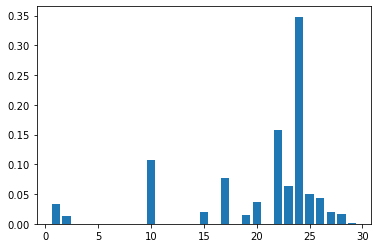

In [28]:
# 각 category가 차이하는 비율

category_rate = df.groupby('categoryId').count().iloc[:,0] / len(df)
print(category_rate)
print('검산 모두 합치면 :', category_rate.sum())
plt.bar(category_rate.index, df.groupby('categoryId').count().iloc[:,0] / len(df))

### df와 cat을 categoryId, id로 하여금 합치기

In [29]:
print('df의 categoryId :', np.unique(df.categoryId))
print('cat의 id :', np.unique(cat.id))
np.in1d(np.unique(df.categoryId), np.unique(cat.id))

# cat의 id가 df의 categoryId보다 많지만, df의 categoryId에서 29번이
# cat의 id에 있지 않다.

df의 categoryId : [ 1  2 10 15 17 19 20 22 23 24 25 26 27 28 29]
cat의 id : [ 1  2 10 15 17 18 19 20 21 22 23 24 25 26 27 28 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [30]:
# 붙일 cat 데이터 수정

cat_paste = cat.loc[:,['id','snippet.title']]
cat_paste.columns = ['id','category_name']
cat_paste.head(5)

,id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [31]:
df1 = pd.merge(df, cat_paste, left_on='categoryId', right_on='id', how='left')
df1.head(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,id,category_name
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48+00:00,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12 00:00:00+00:00,보겸|bokyem,5947503,53326,105756,139946,False,False,NaN,24.0,Entertainment


In [32]:
print(df1.loc[:,['categoryId','id']].head(5))
df1.drop('id',axis=1)
df1.head(1)

   categoryId    id
0          24  24.0
1           1   1.0
2          22  22.0
3          24  24.0
4          10  10.0


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,id,category_name
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48+00:00,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12 00:00:00+00:00,보겸|bokyem,5947503,53326,105756,139946,False,False,NaN,24.0,Entertainment


In [33]:
print(df1.shape,'\n')
print(df1.info())

(137554, 17) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137554 entries, 0 to 137553
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           137554 non-null  object             
 1   title              137554 non-null  object             
 2   publishedAt        137554 non-null  datetime64[ns, UTC]
 3   channelId          137554 non-null  object             
 4   channelTitle       137554 non-null  object             
 5   categoryId         137554 non-null  int64              
 6   trending_date      137554 non-null  datetime64[ns, UTC]
 7   tags               137554 non-null  object             
 8   view_count         137554 non-null  int64              
 9   likes              137554 non-null  int64              
 10  dislikes           137554 non-null  int64              
 11  comment_count      137554 non-null  int64              
 12  comments_disabl

### df의 category_name의 결측값

In [82]:
# category_name의 고유한 값

# .values : 전체 값들이 중복해서 나온다.
df1.category_name.values

array(['Entertainment', 'Film & Animation', 'People & Blogs', ...,
       'People & Blogs', 'Music', 'People & Blogs'], dtype=object)

In [80]:
# .unique() : 고유한 값들만 나온다.

df1.category_name.unique() # 주의! <- () 괄호가 매우 필요하다.
# df1.category_name.unique # <- 이상한 값이 출력
# df1.category_name.values.unique # <- dataframe/series.unique를 해야한다.
# 즉, numpy객체는 안되고 pandas객체만 가지고 있는 함수이다.

array(['Entertainment', 'Film & Animation', 'People & Blogs', 'Music',
       'Comedy', 'Education', 'News & Politics', 'Sports', nan, 'Gaming',
       'Travel & Events', 'Pets & Animals', 'Science & Technology',
       'Howto & Style', 'Autos & Vehicles'], dtype=object)

In [104]:
# np.unique() : 참고로 numpy의 unique() 함수의 경우에는
# pandas객체를 사용하려면 조건이 필요하다.
# 그것은 바로 데이터프레임이더라도 한 열로 존재하며
# 열안의 모든 원소들의 데이터유형이 동일해야하는 것이다.
# 왜냐하면 unique()의 함수 구조가 내부에서 하나씩 등호(==)로 비교를 하기 때문이다.
# 그런데 자료형이 다르면 서로 비교가 불가하다.

# 예를 들어, str와 int가 있는 자료의 경우에는
x = pd.Series(['1',2,3,np.nan])
print(x)

print(np.unique(x)) # 오류가 발생한다.

0      1
1      2
2      3
3    NaN
dtype: object


TypeError: '<' not supported between instances of 'int' and 'str'

In [136]:
# 그리고 df1.category_name의 경우에는 np.nan이라는 str이 아닌 자료형이 있기 때문에
# str로 변환이 필요하다.

print((df1.category_name.astype('str') == df1.category_name).all(),'\n')
print(np.unique(df1.category_name.astype('str')))

False 

['Autos & Vehicles' 'Comedy' 'Education' 'Entertainment'
 'Film & Animation' 'Gaming' 'Howto & Style' 'Music' 'News & Politics'
 'People & Blogs' 'Pets & Animals' 'Science & Technology' 'Sports'
 'Travel & Events' 'nan']


In [138]:
# 다시 한 번 정리하자면,

# 1. df.unique()는 np.nan이 있어도(자료형이 달라도)
# 이를 고려해서 unique한 것을 반환한다.
print(df1.category_name.unique(), '\n')

# 2. np.unique()는 np.nan을 str형태로 바꿔주어야(자료형이 같아야)
# 이용이 가능하다.
print(np.unique(df1.category_name.astype('str'))) # 참고로 정렬까지 해준다.

# 확인해보면 1은 nan으로 2는 'nan'으로 저장됨을 알 수 있다.

['Entertainment' 'Film & Animation' 'People & Blogs' 'Music' 'Comedy'
 'Education' 'News & Politics' 'Sports' nan 'Gaming' 'Travel & Events'
 'Pets & Animals' 'Science & Technology' 'Howto & Style'
 'Autos & Vehicles'] 

['Autos & Vehicles' 'Comedy' 'Education' 'Entertainment'
 'Film & Animation' 'Gaming' 'Howto & Style' 'Music' 'News & Politics'
 'People & Blogs' 'Pets & Animals' 'Science & Technology' 'Sports'
 'Travel & Events' 'nan']


In [139]:
# 갯수는 모두 nan('nan')을 포함하여 15개씩이다.

print(len(df1.category_name.unique()), len(np.unique(df1.category_name.astype('str'))))

15 15


# 참고 : pandas와 numpy의 nan

In [39]:
import pandas as pd
import numpy as np

In [140]:
d = pd.DataFrame({"a":(1,2,3),'b':[4,5,6]})
d1 = pd.DataFrame({"a":(2,3),'c':[4,0]})
d2 = pd.merge(d,d1,how='outer')
d2

,a,b,c
0,1,4,NaN
1,2,5,4.0
2,3,6,0.0


In [142]:
d2.iat[0,0]=np.nan
d2

,a,b,c
0,NaN,4,NaN
1,2.0,5,4.0
2,3.0,6,0.0


In [147]:
# pandas의 내부함수인 merge를 해서 나타나는 NaN과
# numpy의 내부함수인 nan을 통해 생성한 NaN은 동일하다.
# (참고) from numpy import nan as NA 

print(np.nan == np.nan,'\n') # 그러나 특이하게 두 값은 다르다.
# 이는 특이하게 nan이라는 자료가 비교가 불가능한 값이기 때문이다.
print(type(np.nan)) # 그러나 또 특이하게 float의 자료형이기도 하다.

False 

<class 'float'>


In [148]:
# 재미있는 건 None이라는 값도 있는 것이다.

print(None)
print(type(None)) # NoneType 새로운 형태
print(None==None) # 비교가 가능하다.

# 아래 글을 참고 : https://purplechip.tistory.com/5

# NA(Not Available)
# NaN(Not a Nummber)
# None(빈값)

# 본래 R에서 이렇게 정의되는 것 같으나 파이썬에서는
# NA와 NaN이 같이 NaN으로 생각되는 것 같다.

None
<class 'NoneType'>
True


In [58]:
# isnull vs isna <- 같다!

SyntaxError: invalid syntax (3205357415.py, line 1)

In [154]:
x = pd.Series([1,2,3,np.nan])
x

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [155]:
x.isnull()

0    False
1    False
2    False
3     True
dtype: bool

In [156]:
x.isna()

0    False
1    False
2    False
3     True
dtype: bool

### df의 category_name의 결측값(Continued...)

In [157]:
# categoryId = 29일 때, category_name의 결측발생

df1[df1.loc[:,'categoryId']==29].loc[:,['categoryId','category_name']]

,categoryId,category_name
17,29,NaN
150,29,NaN
303,29,NaN
476,29,NaN
640,29,NaN
...,...,...
133281,29,NaN
133499,29,NaN
133700,29,NaN
133938,29,NaN


In [158]:
# category_name의 결측 총 갯수

df1.category_name.isnull().sum()

239

In [159]:
# category_name이 결측값인 title의 값

list(np.unique(df1[df1.category_name.isnull()].title))

['(고화질) 보너스편!! 실제상황 1인칭 경찰 시점, 응급환자 이송중인 구급차 길을 뚫어주는 싸이카 교통경찰과 시민들',
 '2020년 제야의 종 온라인 타종행사 | 2021년 새해맞이 | 보신각 현장 행사는 진행하지 않습니다.',
 '2020년 제야의 종 온라인 타종행사 | 보신각 현장 행사는 진행하지 않습니다.',
 '6.25전쟁 70주년 기념 유엔참전용사 감사영상 - Thanks to UN veterans.',
 'BTS (방탄소년단) at Global Citizen Live Concert - Permission to Dance | #GlobalCitizenLive',
 'BTS Performs Permission to Dance in Seoul to open Global Citizen Live | Global Citizen Live',
 'BTS Shine Spotlight on the United Nations as Envoys of the President of the Republic of Korea',
 'Coldplay and BTS Share New Song My Universe | Global Citizen Live',
 '[4K][ENG Sub] BTS - With Seoul, 전지적서울시점 시즌3 하이라이트 모음',
 '[Eng sub] 🥦팥시루떡[Adzuki Bean Rice Cake]💛밥솥을 이용해 밥하듯 쉽게해요💛칼밥상#183',
 '[김광일의 입] 文 지지층, “니가 나한테 이럴 수 있어?”',
 '[단독영상] 부산 홈플러스 연산점 5층 주차장에서 차량 추락',
 '[법륜스님의 즉문즉설 제 1670회] 남편과 함께 있을 때 가슴이 답답하고 머리가 멍합니다',
 '[법륜스님의 즉문즉설 제 1706회] 저는 한이 많이 쌓여있어요',
 '가능하시죠?',
 '고등학생 심정지 발생 그리고 숨은 영웅 2탄 살려야한다',
 '도경수 병장 30문 30답',
 '동선 숨겼다가 고발을 당했다. 2억이 나왔다ㅣ넋 나간 가족',
 '동지팥죽을 여러 번

In [160]:
# category_name 결측값 채우기

# 1. fillna()
df2 = df1.fillna({'category_name':'Nonprofits & Activism'})
print(df2.category_name.isna().any())

# 2. np.nan != np.nan 이용
df3 = df1
df3.loc[df3['category_name'] != df3['category_name'], 'category_name'] = 'Nonprofits & Activism'
print(df3.category_name.isna().any())

False
False


## 4. 요약통계량

In [161]:
df2.describe()

,categoryId,view_count,likes,dislikes,comment_count,id
count,137554.000000,1.375540e+05,1.375540e+05,137554.000000,1.375540e+05,137315.000000
mean,20.426843,1.618720e+06,7.406458e+04,870.091957,8.841621e+03,20.411921
std,6.267271,6.166372e+06,4.292023e+05,9655.556540,1.125411e+05,6.262499
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000
25%,19.000000,3.356400e+05,5.743000e+03,0.000000,5.470000e+02,19.000000
50%,23.000000,6.521940e+05,1.157800e+04,129.000000,1.215000e+03,23.000000
75%,24.000000,1.307116e+06,2.634875e+04,350.000000,2.870000e+03,24.000000
max,29.000000,2.963142e+08,1.646425e+07,879358.000000,6.939302e+06,28.000000


In [162]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137554 entries, 0 to 137553
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           137554 non-null  object             
 1   title              137554 non-null  object             
 2   publishedAt        137554 non-null  datetime64[ns, UTC]
 3   channelId          137554 non-null  object             
 4   channelTitle       137554 non-null  object             
 5   categoryId         137554 non-null  int64              
 6   trending_date      137554 non-null  datetime64[ns, UTC]
 7   tags               137554 non-null  object             
 8   view_count         137554 non-null  int64              
 9   likes              137554 non-null  int64              
 10  dislikes           137554 non-null  int64              
 11  comment_count      137554 non-null  int64              
 12  comments_disabled  137554 non-

## 5. dataframe csv 파일로 저장

In [195]:
df2.to_csv("/Users/namhunkim/Downloads/youtube_data_modified2.csv", sep=',', index=False, encoding='utf-8')

In [172]:
df2.loc[13,'description'] # 이상하게 저장된 부분을 살펴보니 description의 '\r' 때문인 것으로 추정된다.

'영화 : 올 더 머니#세계부자1위 #납치 #실화영화안녕하십니까\r무비트립입니다!!\r\r무비트립 페이스북!\r- https://www.facebook.com/movietripyoutube/?fref=ts\r\r무비트립 이메일\r- movietripyoutube@naver.com'

### '\r'로 인해서 csv파일이 이상하게 저장된다. 이상한 곳에서 띄어쓰기가 되어있다.

In [173]:
print('\r') # csv파일에 나타났던 띄어쓰기가 이 때문인 것 같다.

In [192]:
# description에 있는 '\r'을 제거해준다.

for i in range(df2.shape[0]):
    if df2.loc[i,'description'] == df2.loc[i,'description']: # NaN 제외
            df2.loc[i,'description'] = df2.loc[i,'description'].replace('\r','')

In [ ]:
# 혹은 불러올시에 lineterminator='\n'을 사용하면 된다고 한다.

## 6. 추가분석

In [ ]:
....

In [ ]:
제목 채널이름 길이 상관관계

In [ ]:
채널 << 동영상수

In [ ]:
group1 = 채널 인기동영상 4개 이상
group2 = 채널 인기동영상 1개

In [ ]:
cat.id.unique()

In [ ]:
import pandas as pd

In [ ]:
x = pd.read_csv('/Users/namhunkim/Downloads/archive/USvideos.csv')
x

In [ ]:
'WE' in x.title

In [ ]:
df[df['title'].str.contains('BTS')]

In [ ]:
x[x['title'].str.contains('BTS')]